# Decision Tree Classification

## Lab Assignment - Iris Flower Classification

This exercise is understanding the decision tree classifier over the IRIS data set. 

Perform the following operations:

#### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

**BONUS Question - 0.5 mark**

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.
**BONUS Question - 1 mark**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
#cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('datasets/iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df['flower'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 

In [5]:


flower_mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

df['flower']=df['flower'].apply(lambda x:flower_mapping[x])

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,flower
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

In [6]:
df_sestosa=df[df['flower']==0]
df_versicolor=df[df['flower']==1]
df_virginica=df[df['flower']==2]

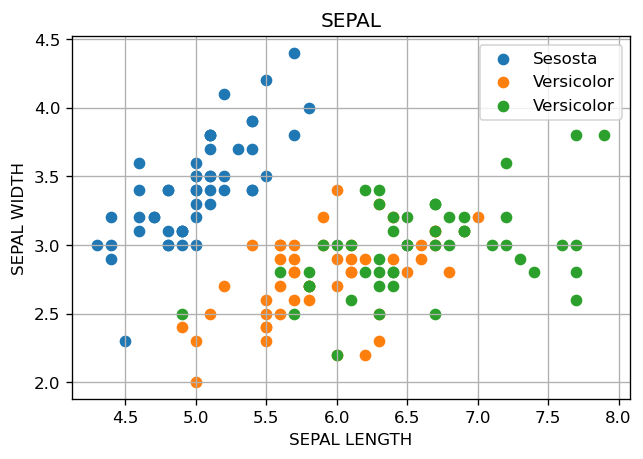

In [7]:
plt.figure(dpi=120)
plt.title('SEPAL')
plt.scatter(df_sestosa['sepal_length'],df_sestosa['sepal_width'],label='Sesosta')
plt.scatter(df_versicolor['sepal_length'],df_versicolor['sepal_width'],label='Versicolor')
plt.scatter(df_virginica['sepal_length'],df_virginica['sepal_width'],label='Versicolor')
plt.xlabel('SEPAL LENGTH')
plt.ylabel('SEPAL WIDTH')
plt.legend()
plt.grid(True)


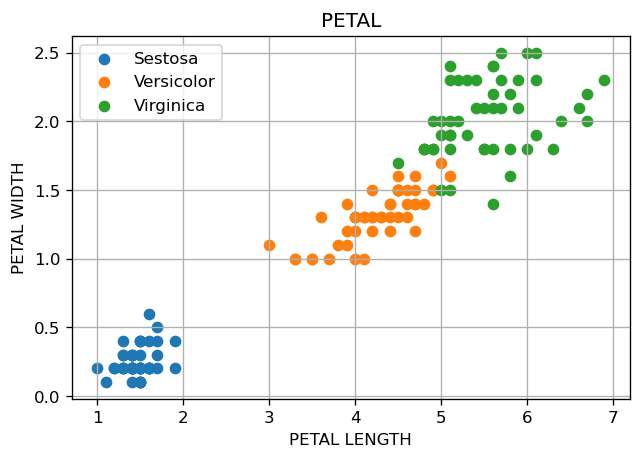

In [8]:
plt.figure(dpi=120)
plt.title('PETAL')
plt.scatter(df_sestosa['petal_length'],df_sestosa['petal_width'],label='Sestosa')
plt.scatter(df_versicolor['petal_length'],df_versicolor['petal_width'],label='Versicolor')
plt.scatter(df_virginica['petal_length'],df_virginica['petal_width'],label='Virginica')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')
plt.legend()
plt.grid()

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

In [9]:
from sklearn.model_selection import train_test_split

pet_len_train,pet_len_test, pet_wid_train,pet_wid_test = train_test_split(df[['petal_length','petal_width']],df['flower'],test_size=0.2,random_state=3)

#print(np.array(pet_len_test).tolist())

In [10]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(pet_len_train,pet_wid_train)

In [11]:
print("Extracted class: ",decisiontree.classes_)
obtained_tree.predict([[5.1,3.5]])

Extracted class:  [0 1 2]


array([2], dtype=int64)

#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.


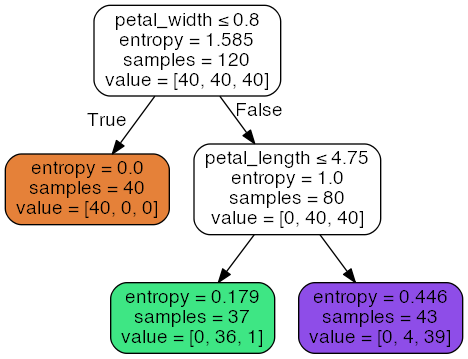

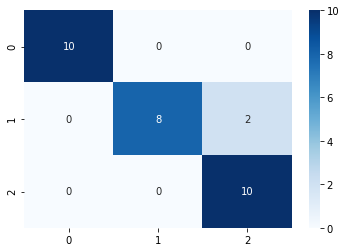

In [12]:
import seaborn
import numpy as np
predicted=obtained_tree.predict(np.array(pet_len_test).tolist())
seaborn.heatmap(confusion_matrix(pet_wid_test,predicted),annot=True,cmap="Blues",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)


import os

os.environ["PATH"] += os.pathsep + \
'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['petal_length','petal_width'] ,special_characters=True)


graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

### MAX DEPTH 3


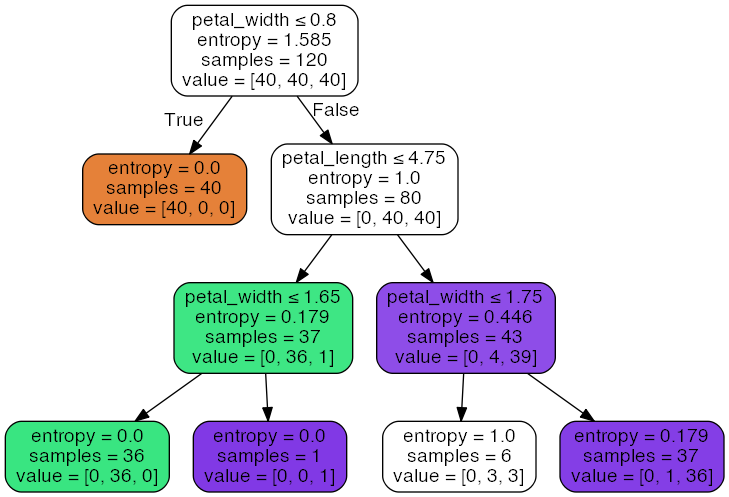

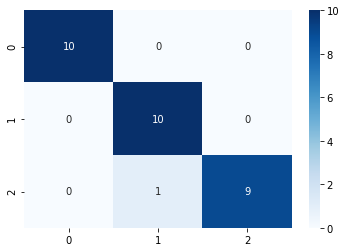

In [13]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(pet_len_train,pet_wid_train)

import seaborn
import numpy as np
predicted=obtained_tree.predict(np.array(pet_len_test).tolist())
seaborn.heatmap(confusion_matrix(pet_wid_test,predicted),annot=True,cmap="Blues",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)


import os

os.environ["PATH"] += os.pathsep + \
'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['petal_length','petal_width'] ,special_characters=True)


graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'сmap'


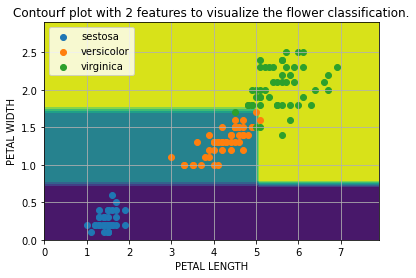

In [17]:
%matplotlib inline 
import numpy as np

x_min, x_max=0,8 # sleepy y min,
y_min ,y_max=0,3     # grumpy

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange (y_min, y_max, 0.1))

#print(xx); print(yy) 
xx_lin = xx.ravel() #print(xx_lin); 
yy_lin =yy.ravel(); #printyy lin); 
pred_input= np.c_[xx_lin, yy_lin]; #print(pred_input)

Z=obtained_tree.predict(pred_input) #print(Z); 
Z=Z.reshape(xx.shape) #print(Z);
# #Contour plot requires 2 dimensional matrix 
plt.contourf(xx, yy, Z, сmap=plt.cm.Pastel1)


plt.title('Contourf plot with 2 features to visualize the flower classification.')
plt.scatter(df_sestosa['petal_length'],df_sestosa['petal_width'],label='sestosa')
plt.scatter(df_versicolor['petal_length'],df_versicolor['petal_width'],label='versicolor')
plt.scatter(df_virginica['petal_length'],df_virginica['petal_width'],label='virginica')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')
plt.legend()
plt.grid()

### MAX DEPTH 4

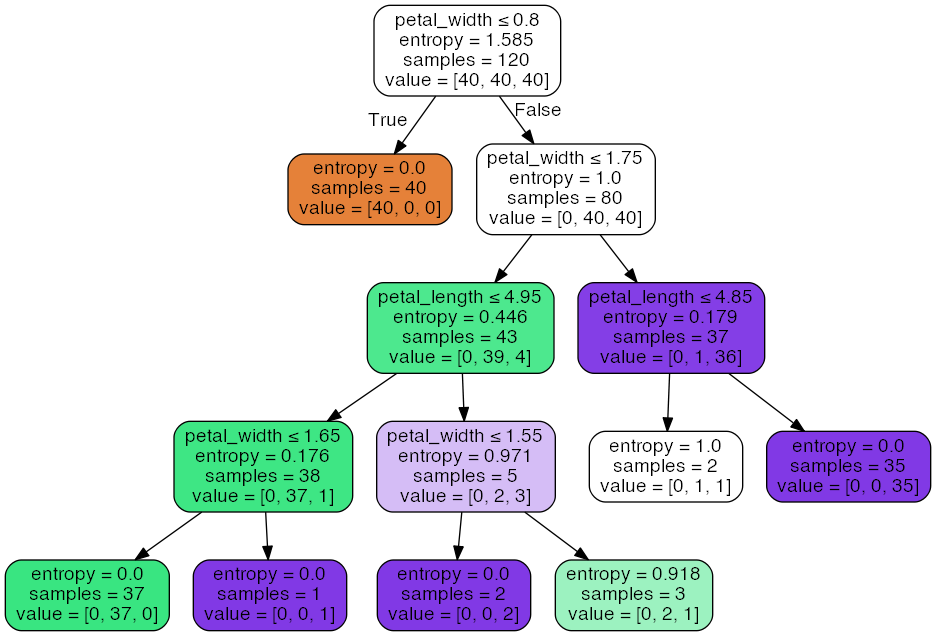

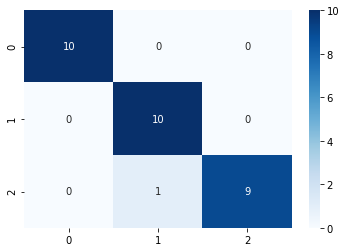

In [15]:

decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree=decisiontree.fit(pet_len_train,pet_wid_train)
import seaborn
import numpy as np
predicted=obtained_tree.predict(np.array(pet_len_test).tolist())
seaborn.heatmap(confusion_matrix(pet_wid_test,predicted),annot=True,cmap="Blues",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)


import os

os.environ["PATH"] += os.pathsep + \
'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['petal_length','petal_width'] ,special_characters=True)


graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.
**BONUS Question - 1 mark**

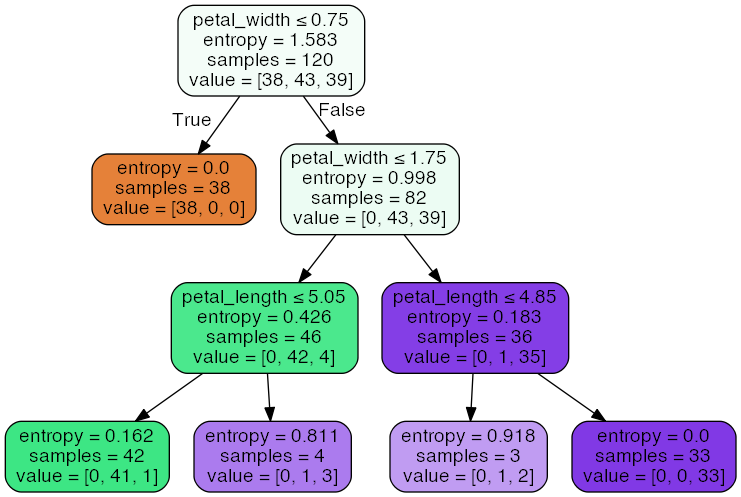

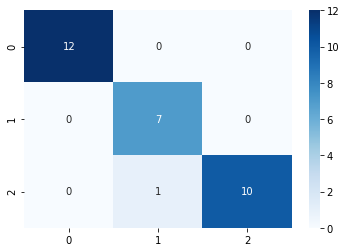

In [16]:
from sklearn.model_selection import train_test_split

pet_len_train,pet_len_test, pet_wid_train,pet_wid_test = train_test_split(df[['petal_length','petal_width']],df['flower'],test_size=0.2,random_state=9032)



decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(pet_len_train,pet_wid_train)

import seaborn
import numpy as np
predicted=obtained_tree.predict(np.array(pet_len_test).tolist())
seaborn.heatmap(confusion_matrix(pet_wid_test,predicted),annot=True,cmap="Blues",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)


import os

os.environ["PATH"] += os.pathsep + \
'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['petal_length','petal_width'] ,special_characters=True)


graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())


- We can also see that when random state is 9032 each flower in the training set does not have 40 data points.
- the accuracy of the model is reduced